# Loading Libraries and Initialize

In [1]:
import jalali
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 

In [2]:
alldata = pd.read_csv('Data//Daily.csv', names = ['category', 'persian_date', 'value'], header=None)
alldata['date'] = alldata.apply(lambda row: jalali.Persian(row['persian_date']).gregorian_string("{}/{}/{}"), axis=1)
alldata['date'] = pd.to_datetime(alldata['date'])
alldata.set_index('date', inplace=True)
alldata.head(5)

,category,persian_date,value
date,,,
2011-11-22,1,1390/09/01,802346265.0
2011-11-23,1,1390/09/02,800163615.4
2011-11-24,1,1390/09/03,799576354.8
2011-11-25,1,1390/09/04,397532964.0
2011-11-26,1,1390/09/05,795573831.1


# Plotting the values

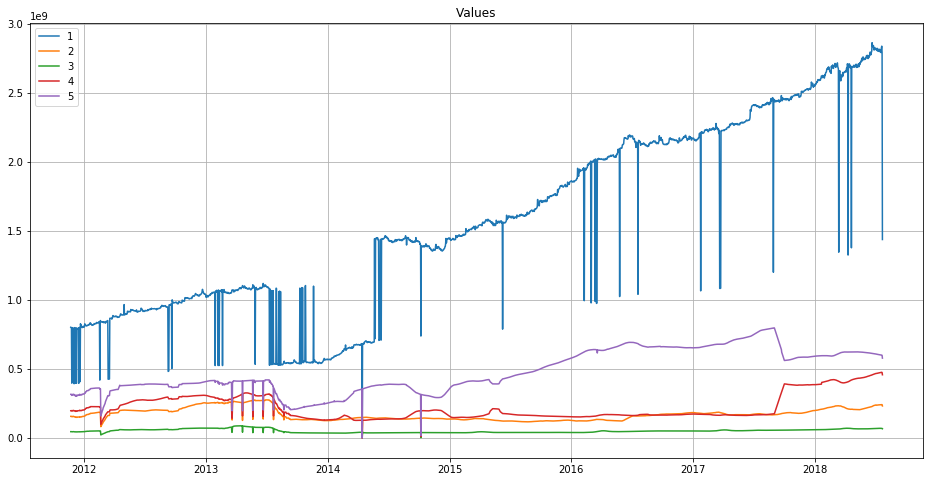

In [57]:
plt.figure(figsize=(16,8))
plt.title('Values')

plt.plot(alldata[alldata['category'] == 1]['value'], label='1')
plt.plot(alldata[alldata['category'] == 2]['value'], label='2')
plt.plot(alldata[alldata['category'] == 3]['value'], label='3')
plt.plot(alldata[alldata['category'] == 4]['value'], label='4')
plt.plot(alldata[alldata['category'] == 5]['value'], label='5')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Changing the data shape

In [11]:
df1 = alldata[alldata['category'] == 1]
df2 = alldata[alldata['category'] == 2]
df3 = alldata[alldata['category'] == 3]
df4 = alldata[alldata['category'] == 4]
df5 = alldata[alldata['category'] == 5]
df = df1.join(df2, rsuffix='_2').join(df3, rsuffix='_3').join(df4, rsuffix='_4').join(df5, rsuffix='_5')
df = df.drop(columns=['category', 'category_2', 'category_3', 'category_4', 'category_5'])
df = df.drop(columns=['persian_date_2', 'persian_date_3', 'persian_date_4', 'persian_date_5'])
df.columns = ['persian_date', 'value_1', 'value_2', 'value_3', 'value_4', 'value_5']
df.head(5)

,persian_date,value_1,value_2,value_3,value_4,value_5
date,,,,,,
2011-11-22,1390/09/01,802346265.0,157107300.0,46086321.13,197826487.7,316479878.1
2011-11-23,1390/09/02,800163615.4,157196555.6,46097887.71,198213901.8,316477346.5
2011-11-24,1390/09/03,799576354.8,157291027.3,46082325.29,198550239.2,316499380.5
2011-11-25,1390/09/04,397532964.0,154622449.3,45258845.52,195186472.8,308512417.6
2011-11-26,1390/09/05,795573831.1,154459936.1,45245903.65,195486826.7,310879748.3


# Detecting Outliers 

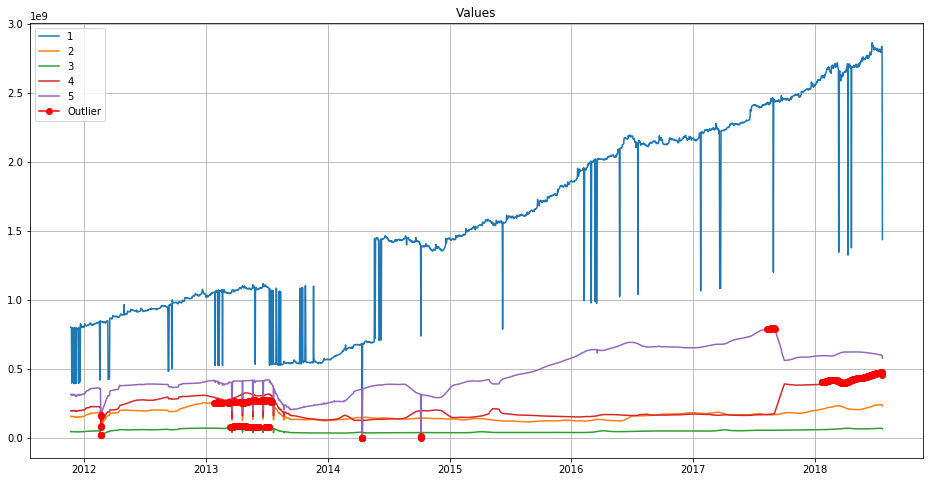

In [61]:
min_o = df['value_1'].mean() - 2 * df['value_1'].std()
max_o = df['value_1'].mean() + 2 * df['value_1'].std()
df['o_1'] = df[(df['value_1'] <  min_o) | (df['value_1'] >  max_o)]['value_1']
min_o = df['value_2'].mean() - 2 * df['value_2'].std()
max_o = df['value_2'].mean() + 2 * df['value_2'].std()
df['o_2'] = df[(df['value_2'] <  min_o) | (df['value_2'] >  max_o)]['value_2']
min_o = df['value_3'].mean() - 2 * df['value_3'].std()
max_o = df['value_3'].mean() + 2 * df['value_3'].std()
df['o_3'] = df[(df['value_3'] <  min_o) | (df['value_3'] >  max_o)]['value_3']
min_o = df['value_4'].mean() - 2 * df['value_4'].std()
max_o = df['value_4'].mean() + 2 * df['value_4'].std()
df['o_4'] = df[(df['value_4'] <  min_o) | (df['value_4'] >  max_o)]['value_4']
min_o = df['value_5'].mean() - 2 * df['value_5'].std()
max_o = df['value_5'].mean() + 2 * df['value_5'].std()
df['o_5'] = df[(df['value_5'] <  min_o) | (df['value_5'] >  max_o)]['value_5']


plt.figure(figsize=(16,8))
plt.title('Values')

plt.plot(df['value_1'], label='1')
plt.plot(df['value_2'], label='2')
plt.plot(df['value_3'], label='3')
plt.plot(df['value_4'], label='4')
plt.plot(df['value_5'], label='5')

plt.plot(df['o_1'], label='Outlier', marker='o', color='r')
plt.plot(df['o_2'], marker='o', color='r', label='_nolegend_')
plt.plot(df['o_3'], marker='o', color='r', label='_nolegend_')
plt.plot(df['o_4'], marker='o', color='r', label='_nolegend_')
plt.plot(df['o_5'], marker='o', color='r', label='_nolegend_')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()